# Exploratory Data Analysis

## Import library

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**We have two dataset, one for recipes, and one for reviews of the recipes.**

## Analysis of Raw Recipes Dataset

Code adapted from reference https://www.kaggle.com/etsc9287/food-com-eda-and-text-analysis  

In [3]:
recipes = pd.read_csv('data/RAW_recipes.csv')
print(recipes.shape)
recipes.head(3)

(231637, 12)


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13


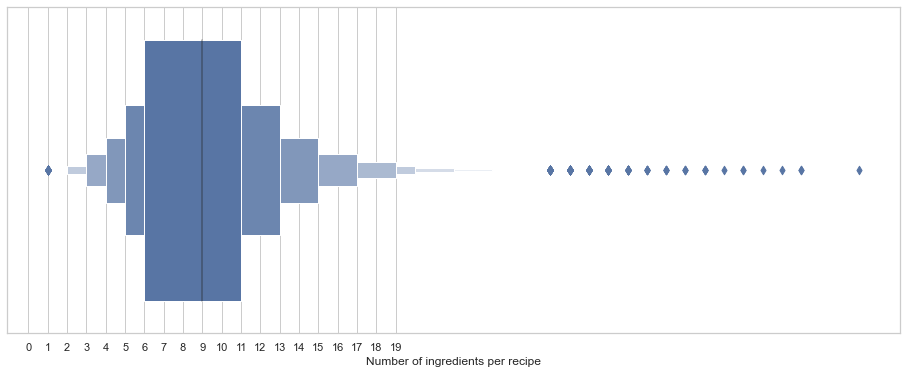

In [4]:
sns.set(rc={'figure.figsize':(16,6)})
sns.set(style = "whitegrid")
ax = sns.boxenplot(x = recipes['n_ingredients'])
ax.set_xticks(np.arange(0,20))
ax.set_xlabel('Number of ingredients per recipe')
plt.show()

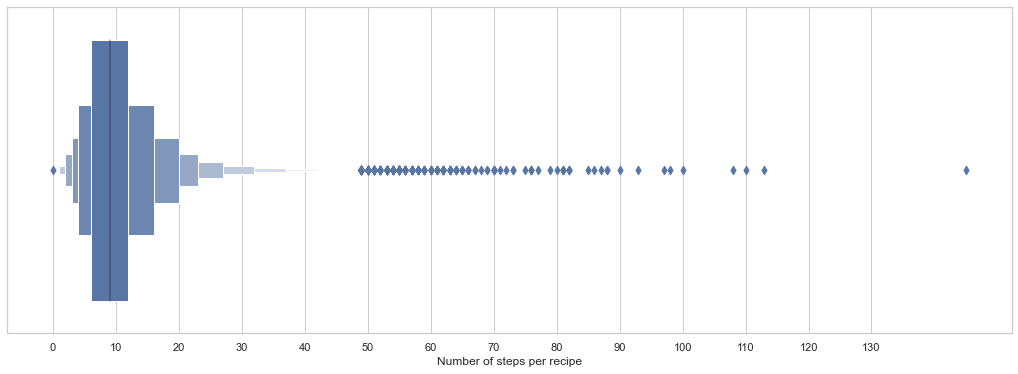

In [5]:
sns.set(rc={'figure.figsize':(18,6)})
sns.set(style = "whitegrid")
ax = sns.boxenplot(x = recipes['n_steps'])
ax.set_xticks(np.arange(0,140, 10))
ax.set_xlabel('Number of steps per recipe')
plt.show()

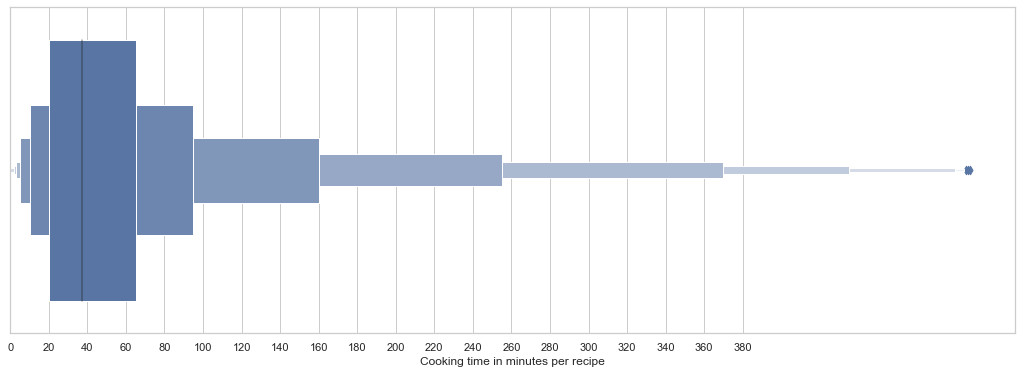

In [6]:
sns.set(rc={'figure.figsize':(18,6)})
sns.set(style = "whitegrid")
ax = sns.boxenplot(x = recipes.loc[recipes['minutes']< 500, ['minutes']])
ax.set_xticks(np.arange(0,400,20))
ax.set_xlabel('Cooking time in minutes per recipe')
plt.show()

**Nutritional values extraction**

In [7]:
nutrition_names = ["calories", "total_fat", "sugar", "sodium", "protein", "sat_fat", "carbs"]

In [8]:
for i, nutrition_name in enumerate(nutrition_names):
    recipes[nutrition_name] = recipes['nutrition'].map(lambda s: eval(s)[i])

In [9]:
pd.set_option('display.max_columns', 50)
print(recipes.shape)
recipes.head(1)

(231637, 19)


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,calories,total_fat,sugar,sodium,protein,sat_fat,carbs
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0


**Make histotram from nutrition columns (outlier values are cut off). Vertical redline indicated median value**

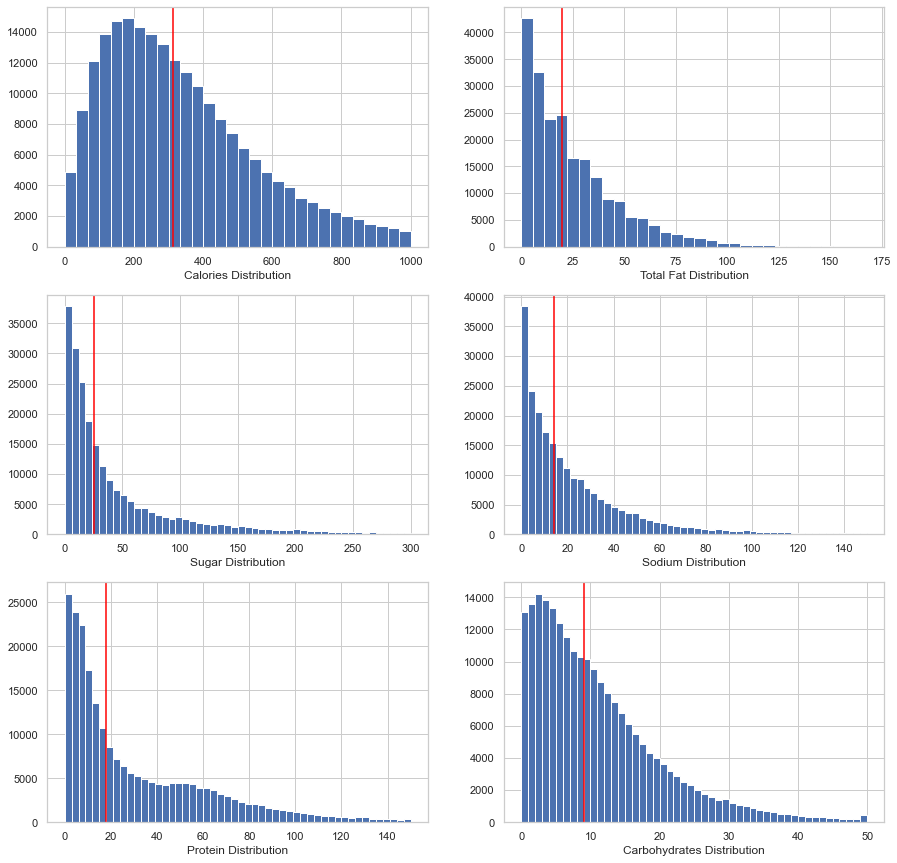

In [10]:
fig, ax = plt.subplots(3, 2, figsize=(15,15))

ax[0, 0].hist(recipes[recipes['calories']<=1_000]['calories'], bins=30) #row=0, col=0
ax[0, 0].set_xlabel("Calories Distribution")
ax[0, 0].axvline(x=recipes['calories'].median(), color='red')

ax[0, 1].hist(recipes[recipes['calories']<=1_000]['total_fat'], bins=30) #row=0, col=1
ax[0, 1].set_xlabel("Total Fat Distribution")
ax[0, 1].axvline(x=recipes['total_fat'].median(), color='red')

ax[1, 0].hist(recipes[recipes['sugar']<=300]['sugar'], bins=50) #row=0, col=0
ax[1, 0].set_xlabel("Sugar Distribution")
ax[1, 0].axvline(x=recipes['sugar'].median(), color='red')

ax[1, 1].hist(recipes[recipes['sodium']<=150]['sodium'], bins=50) #row=0, col=0
ax[1, 1].set_xlabel("Sodium Distribution")
ax[1, 1].axvline(x=recipes['sodium'].median(), color='red')

ax[2, 0].hist(recipes[recipes['protein']<=150]['protein'], bins=50) #row=0, col=0
ax[2, 0].set_xlabel("Protein Distribution")
ax[2, 0].axvline(x=recipes['protein'].median(), color='red')

ax[2, 1].hist(recipes[recipes['carbs']<=50]['carbs'], bins=50) #row=0, col=0
ax[2, 1].set_xlabel("Carbohydrates Distribution")
ax[2, 1].axvline(x=recipes['carbs'].median(), color='red')

plt.show();

**Find top 20 ingredients.**

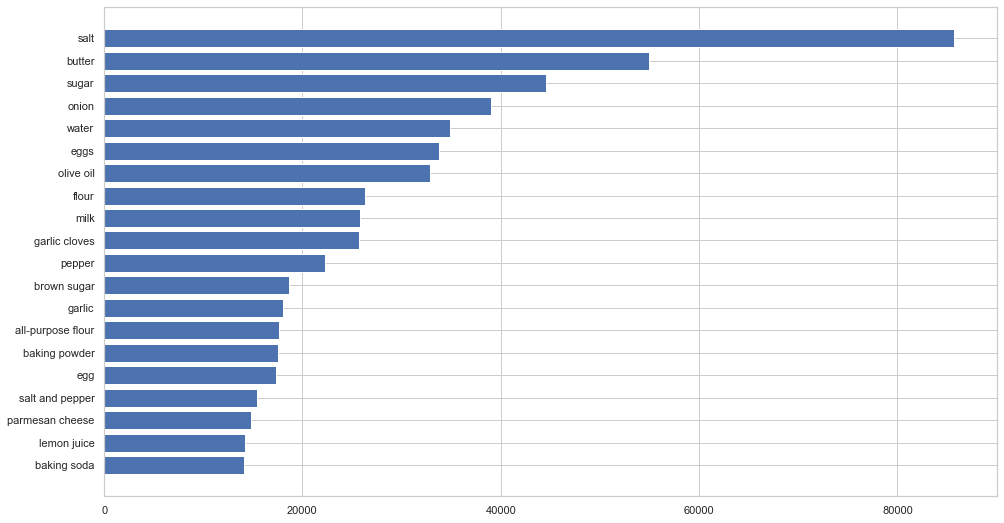

In [11]:
ingredient_list=[]
ingredient_words = recipes['ingredients'].map(lambda s: s.strip('[').strip(']').replace("'", "").split(', '))
for row in ingredient_words:
    ingredient_list.extend(row)
# Plot top 20 ingredients in the recipe data set.
plt.figure(figsize=(16,9))
plt.barh(pd.Series(ingredient_list).value_counts()[:20].index, pd.Series(ingredient_list).value_counts()[:20].values)
plt.gca().invert_yaxis();

**Word Cloud for Recipe for Ingredient and Recipe names**

**Explore the words in recipe names**

In [12]:
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
stop = stopwords.words('english') + list(string.punctuation)
name_list=[]
for row in recipes['name'].map(lambda s: [i for i in word_tokenize(str(s).lower()) if i not in stop]):
    name_list.extend(row)

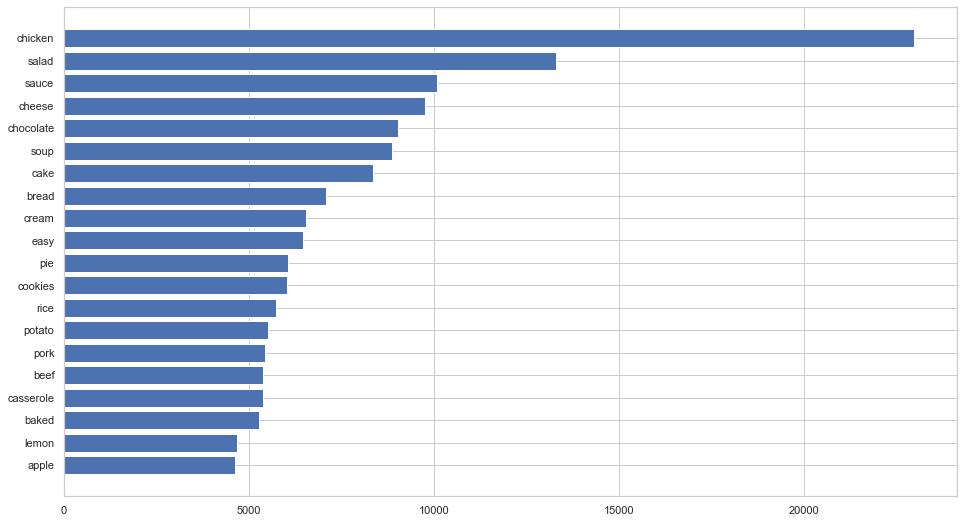

In [13]:
# Plot top 20 words in the recipe names data set.
plt.figure(figsize=(16,9))
plt.barh(pd.Series(name_list).value_counts()[:20].index, pd.Series(name_list).value_counts()[:20].values)
plt.gca().invert_yaxis();

In [72]:
from wordcloud import WordCloud, STOPWORDS

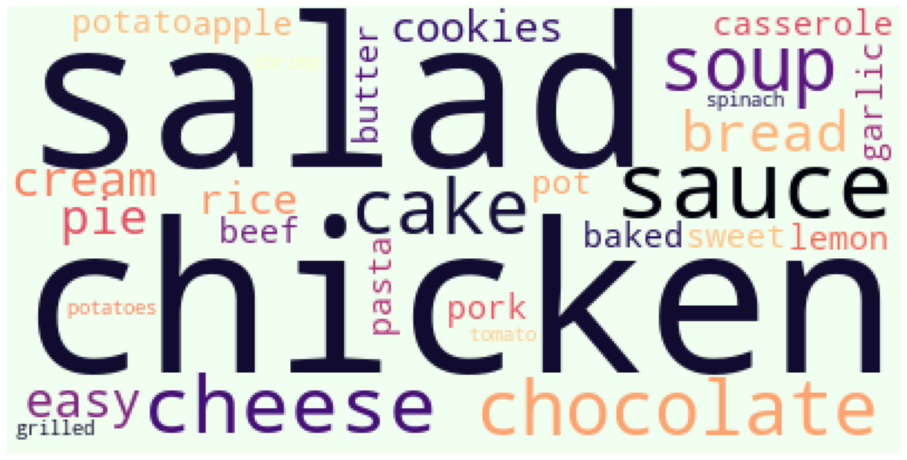

In [17]:
text=' '.join(pd.Series(name_list).value_counts()[:30].index)
wc = WordCloud(colormap = 'magma', 
               background_color = 'honeydew', random_state = 42).generate(text)
plt.figure(figsize = (16, 16))

plt.imshow(wc)
plt.axis('off')
plt.title('');

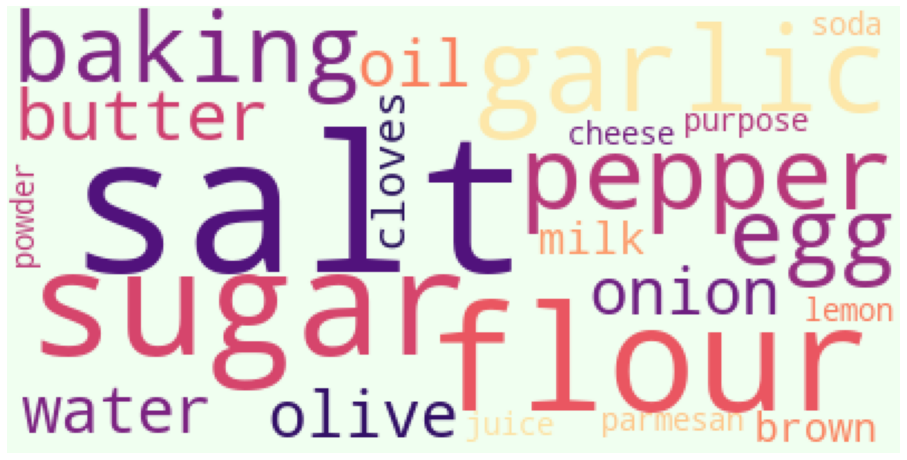

In [18]:
text=' '.join(pd.Series(ingredient_list).value_counts()[:20].index)
wc = WordCloud(colormap = 'magma', 
               background_color = 'honeydew', random_state = 2).generate(text)
plt.figure(figsize = (16, 16))

plt.imshow(wc)
plt.axis('off')
plt.title('');


## Analysis of Raw Review Dataset
Code adapted from  https://www.kaggle.com/paragap/interactions-rating-classifier

In [19]:
ratings = pd.read_csv('data/RAW_interactions.csv')
print(ratings.shape)
ratings.head(3)

(1132367, 5)


,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...


In [27]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


### The dataset has 1,132,368 rows, 5 colums

In [25]:
ratings['rating'].value_counts(ascending=True, normalize=True)

1    0.011320
2    0.012472
3    0.036079
0    0.053734
4    0.165459
5    0.720936
Name: rating, dtype: float64

### Most of the rating (72%) has a score of 5

In [35]:
ratings['review_length'] = ratings['review'].map(lambda s: len(str(s)))

In [68]:
print(ratings['review_length'].median())
print('mean review charactor count')
print(ratings.groupby('rating')['review_length'].mean())
print()
print('median review charactor count')
print(ratings.groupby('rating')['review_length'].median())

237.0
mean review charactor count
rating
0    250.648315
1    253.407162
2    280.330808
3    300.543459
4    290.887612
5    276.809458
Name: review_length, dtype: float64

median review charactor count
rating
0    195
1    202
2    229
3    251
4    248
5    237
Name: review_length, dtype: int64


### The mean and median of review charator count does not make much difference with different ratings.
**Boxplots are shown below**

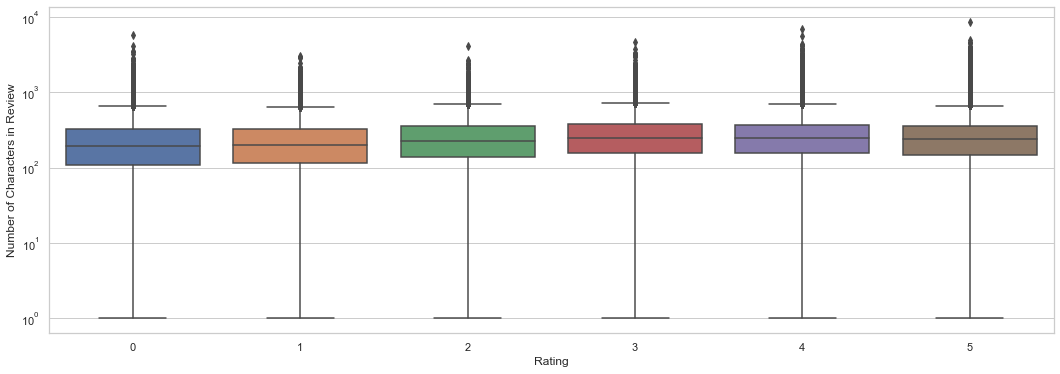

In [58]:
dd=pd.melt(ratings,id_vars=['rating'],value_vars=['review_length'])
plt.yscale('log')
ax = sns.boxplot(x='rating',y='value',data=dd)
ax.set(xlabel='Rating', ylabel='Number of Characters in Review');

In [70]:
ratings[['rating','review_length']].corr()

,rating,review_length
rating,1.000000,0.019356
review_length,0.019356,1.000000


**As shown in the boxplot and table, rating does NOT have strong coorelation with charactor counts**

Word Cloud for Rating: 4


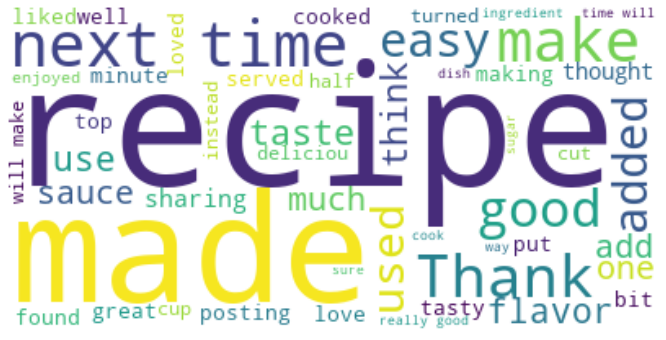

Word Cloud for Rating: 5


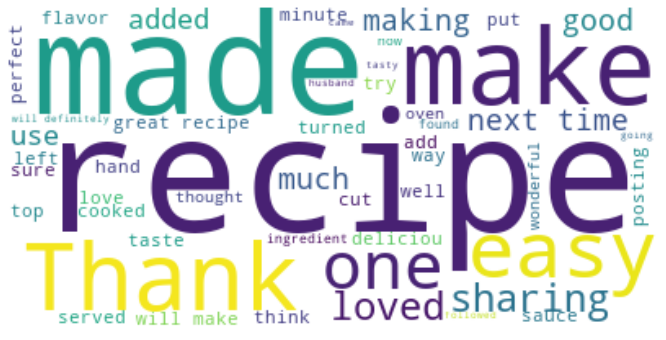

Word Cloud for Rating: 0


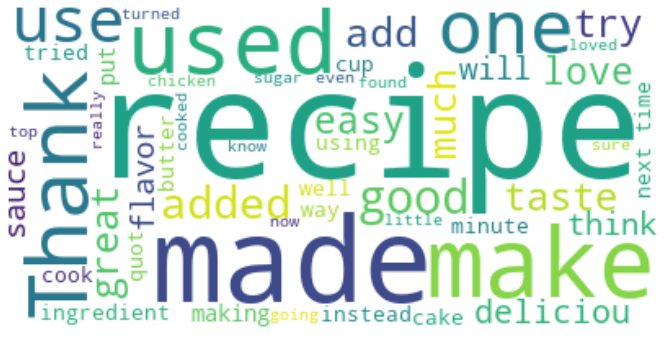

Word Cloud for Rating: 2


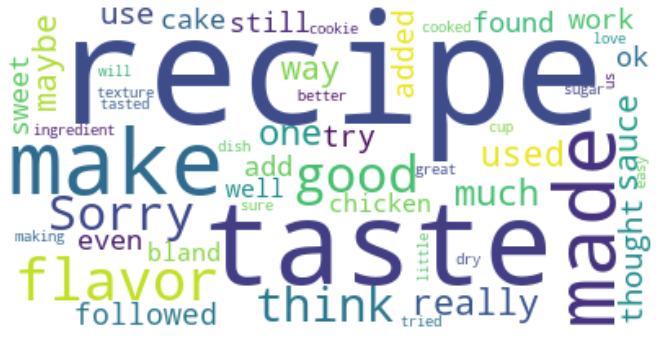

Word Cloud for Rating: 3


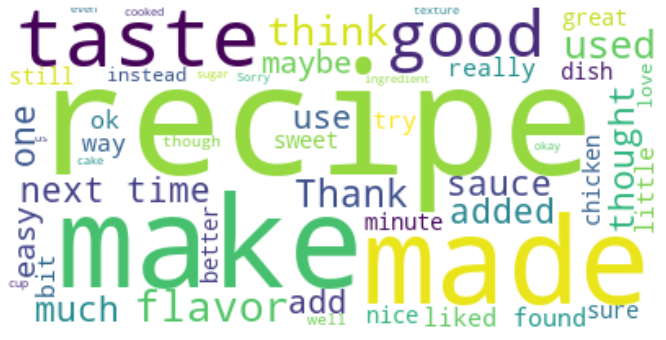

Word Cloud for Rating: 1


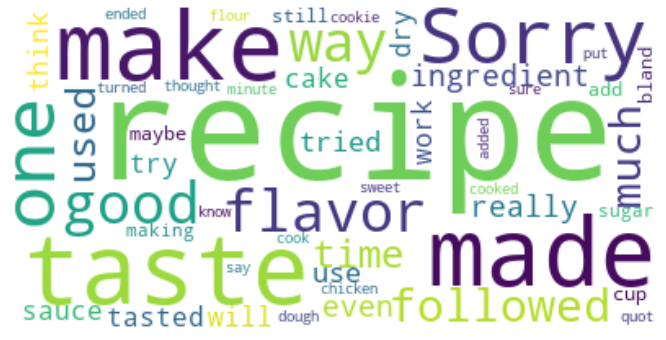

In [73]:
unique_ratings = ratings["rating"].unique()
# Create stopword list:
stopwords = set(STOPWORDS)
for rating in unique_ratings:
    temp_text = ratings[ratings["rating"]== rating]["review"]
    collapsed_temp_text = temp_text.str.cat(sep=' ')

    print("Word Cloud for Rating: %s"%(rating))

    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=50).generate(collapsed_temp_text)

    # Display the generated image:
    # the matplotlib way:1
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()